**1. Importamos las librerías**

In [1]:
import numpy as np # Importamos numpy para trabajar con matrices
import pandas as pd # Importamos pandas para trabajar con dataframes
import itertools # Importamos itertools para trabajar con iterables


df = pd.read_csv("mnist_train.csv") # Cargamos el dataset

*Visualizamos las dimensiones del dataset.*

In [2]:
df.shape # Vemos la forma del dataset

(60000, 785)

In [3]:
df.head() # Vemos las primeras filas del dataset

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.tail() # Vemos las últimas filas del dataset

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info() # Vemos la información del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [6]:
df.describe() # Vemos la descripción del dataset

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


**2. Analisis de los datos**

In [7]:
dig = [0,1,2,3,4,5,6,7,8,9] # Creamos una lista con los dígitos
num = [] # Creamos una lista vacía
for i in range(0,10): # Iteramos sobre los dígitos
    num.append(len(df[df['label']==i])) # Añadimos a la lista num la cantidad de veces que aparece el dígito i en la columna label
    
d = {'Dígito': dig, 'Cantidad': num} # Creamos un diccionario con las listas dig y num
df1 = pd.DataFrame(data=d) # Creamos un dataframe con el diccionario d
df1 # Mostramos el dataframe

,Dígito,Cantidad
0,0,5923
1,1,6742
2,2,5958
3,3,6131
4,4,5842
5,5,5421
6,6,5918
7,7,6265
8,8,5851
9,9,5949


**Importamos librerías para visualización de datos**

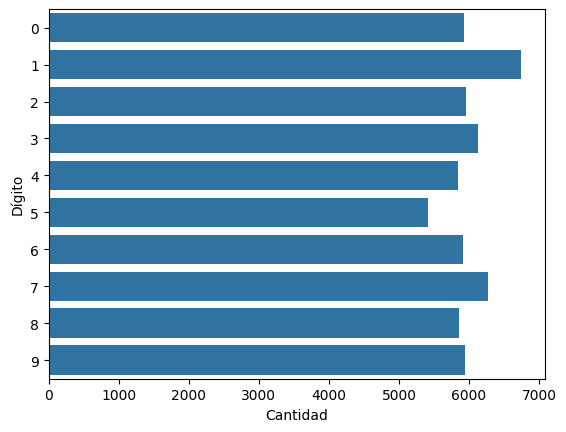

In [8]:
import matplotlib.pyplot as plt # Importamos matplotlib para graficar
import seaborn as sns # Importamos seaborn para graficar
sns.barplot(x = "Cantidad", y = "Dígito", data = df1, orient='h') # Graficamos un gráfico de barras horizontal
plt.show() # Mostramos el gráfico

*Vemos los 5 primeros elementos que tienen la etiqueta (label) igual al número 7*

In [9]:
df[df['label']==7].head() # Mostramos las primeras filas del dataset donde el dígito es 7

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
15,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


*Imprimimos la fila 15*

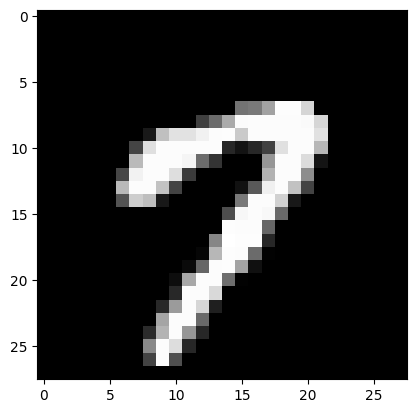

In [10]:
pic = df[15:16].values.reshape(785)[1:].reshape(28,28) # Seleccionamos la fila 15, la convertimos en un array, eliminamos la primera columna y la convertimos en una matriz de 28x28
plt.imshow(pic,cmap='gray') # Mostramos la imagen en escala de grises

*Vemos los 5 primeros elementos que tienen la etiqueta (label) igual al número 9*

In [11]:
df[df['label']==9].head() # Mostramos las primeras filas del dataset donde el dígito es 9

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


*Imprimimos la fila 3*

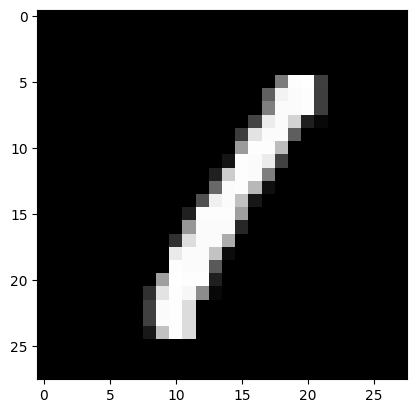

In [12]:
pic = df[3:4].values.reshape(785)[1:].reshape(28,28) # Seleccionamos la fila 3, la convertimos en un array, eliminamos la primera columna y la convertimos en una matriz de 28x28
plt.imshow(pic,cmap='gray') # Mostramos la imagen en escala de grises

**3. Preparamos los datos**

In [13]:
import sklearn.model_selection as skmodel # Importamos sklearn.model_selection para dividir el dataset
X = df.drop(['label'],axis=1) #Variable independiente, todas las columnas menos 'label'
X.head()  # Mostramos las primeras filas de X

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
y = df.label #Variable dependiente (objetivo) seria solo la columna 'label'
y.head() # Mostramos las primeras filas de y

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

In [15]:
import sklearn.model_selection as skmodel # Importamos sklearn.model_selection para dividir el dataset
X_train, X_test, y_train, y_test = skmodel.train_test_split(X, y, test_size=0.33, random_state=1) # Dividimos el dataset en entrenamiento y prueba
print("la longitud de todos los datos es ","{:}".format(len(X))) # Mostramos la longitud de X
print("la longitud del conjunto de entrenamiento es","{:}".format(len(X_train))) # Mostramos la longitud de X_train
print("la longitud del conjunto de prueba es","{:}".format(len(X_test))) # Mostramos la longitud de X_test

la longitud de todos los datos es  60000
la longitud del conjunto de entrenamiento es 40200
la longitud del conjunto de prueba es 19800


**4. Modelado**

In [16]:
import sklearn.neural_network as sknet # Importamos sklearn.neural_network para trabajar con redes neuronales
model = sknet.MLPClassifier(hidden_layer_sizes=(150,100,50), random_state=42) # Creamos un modelo de red neuronal con 3 capas ocultas de 150, 100 y 50 neuronas respectivamente
model.out_activation_ = 'softmax' # Función de activación de la capa de salida
model.fit(X_train,y_train) # Ajustamos el modelo con los datos de entrenamiento

MLPClassifier(hidden_layer_sizes=(150, 100, 50), random_state=42)

In [17]:
print("Exactitud en el conjunto de entrenamiento: {:.2%}".format(model.score(X_train, y_train))) # Mostramos la exactitud en el conjunto de entrenamiento
print("Exactitud en el conjunto de prueba: {:.2%}".format(model.score(X_test, y_test))) # Mostramos la exactitud en el conjunto de prueba

Exactitud en el conjunto de entrenamiento: 99.60%
Exactitud en el conjunto de prueba: 96.69%


**5. Evaluación**

In [18]:
y_pred = model.predict(X_test) # Predecimos los valores de X_test
y_pred[:10] # Mostramos las primeras 10 predicciones

array([3, 2, 7, 8, 2, 3, 5, 2, 8, 9])

In [19]:
y_test[:10].values # Mostramos los valores reales de las primeras 10 predicciones

array([3, 2, 7, 8, 2, 3, 5, 2, 8, 9])

In [20]:
d = {'verdadero': y_test, 'predicho': y_pred} # Creamos un diccionario con los valores reales y predichos
df_mlp = pd.DataFrame(data=d) # Creamos un dataframe con el diccionario d
df_mlp['diferencia'] = df_mlp['predicho']-df_mlp['verdadero'] # Creamos una columna con la diferencia entre los valores reales y predichos
df_mlp # Mostramos el dataframe

,verdadero,predicho,diferencia
15281,3,3,0
21435,2,2,0
44536,7,7,0
13518,8,8,0
47529,2,2,0
...,...,...,...
19202,4,4,0
30019,8,8,0
47950,3,3,0
24959,8,8,0


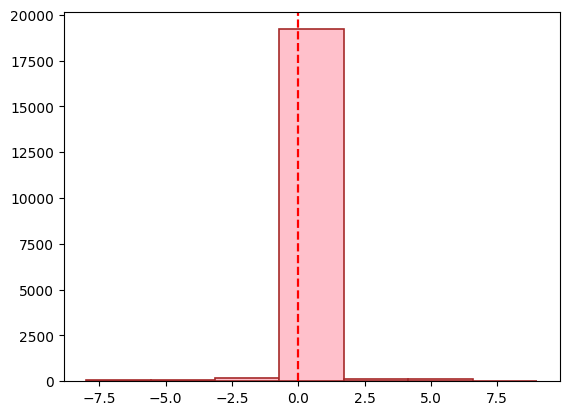

In [21]:
plt.hist(df_mlp['diferencia'], bins=7, color="pink", edgecolor='brown', linewidth=1.2) # Graficamos un histograma con la diferencia entre los valores reales y predichos
plt.axvline(0, color="red", linestyle='dashed', linewidth=1.6) # Añadimos una línea vertical en 0
plt.show() # Mostramos el gráfico

In [22]:
pd.DataFrame(
    {
        "Cantidad": [
            (df_mlp["diferencia"] < 0).sum(), # Contamos la cantidad de valores menores a 0
            (df_mlp["diferencia"] == 0).sum(), # Contamos la cantidad de valores iguales a 0
            (df_mlp["diferencia"] > 0).sum(), # Contamos la cantidad de valores mayores a 0
        ]
    },
    columns=["Cantidad"], # Nombramos la columna
    index=["Mas pequeño", "Cero", "Más grande"], # Nombramos los índices
)

,Cantidad
Mas pequeño,319
Cero,19145
Más grande,336


**Matriz de Confusion**

[[1866    0    9    6    1   13    8    3   13    9]
 [   0 2198   22    3    3    3    1    2    5    1]
 [   5    0 1941    9    0    0    2   13   11    1]
 [   0    2   25 1972    0   20    1    5   12   11]
 [   2    2   16    0 1804    0    8    7    3   54]
 [   0    1    4   36    0 1817   13    0   11    8]
 [   8    0   10    1    0    9 1923    0    8    2]
 [   0    8   18    2    5    4    0 2015    5   13]
 [   3    7    9   26    7   27    9    5 1790   17]
 [   0    4    2   18   17    6    1   11    9 1819]]
Matriz de confusión, sin normalización.


/tmp/ipykernel_97321/1561739611.py:28: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


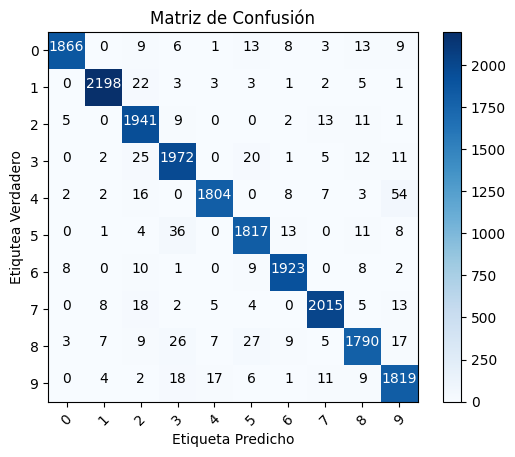

In [23]:
import sklearn.metrics as skmet # Importamos sklearn.metrics para trabajar con métricas

cm = skmet.confusion_matrix(y_true=y_test, y_pred=y_pred) # Creamos una matriz de confusión


def plot_confusion_matrix(
    cm, classes, normalize=False, title="Matriz de Confusión", cmap=plt.cm.Blues
):
    """
    Esta función imprime y dibuja la matriz de confusión.
    La normalización se puede aplicar configurando `normalize=True`.
    """
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusión normalizada.")
    else:
        print("Matriz de confusión, sin normalización.")


print(cm)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
    
plt.tight_layout()
plt.ylabel('Etiqutea Verdadero')
plt.xlabel('Etiqueta Predicho')
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Matriz de Confusión')

In [24]:
print("\033[1m El resultado nos dice que tenemos: ",(cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4]+cm[5,5]+cm[6,6]+cm[7,7]+cm[8,8]+cm[9,9]),"predicciones correctas.")
print("\033[1m El resultado nos dice que tenemos: ",(cm.sum()-(cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4]+cm[5,5]+cm[6,6]+cm[7,7]+cm[8,8]+cm[9,9])),"predicciones incorrectas.")
print("\033[1m Tenemos el total de predicciones es: ",(cm.sum()))

 El resultado nos dice que tenemos:  19145 predicciones correctas.
 El resultado nos dice que tenemos:  655 predicciones incorrectas.
 Tenemos el total de predicciones es:  19800


**Calculamos precision, recall, f-score y support**

In [25]:
print(skmet.classification_report(y_test,y_pred)) # Mostramos el reporte de clasificación

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1928
           1       0.99      0.98      0.99      2238
           2       0.94      0.98      0.96      1982
           3       0.95      0.96      0.96      2048
           4       0.98      0.95      0.97      1896
           5       0.96      0.96      0.96      1890
           6       0.98      0.98      0.98      1961
           7       0.98      0.97      0.98      2070
           8       0.96      0.94      0.95      1900
           9       0.94      0.96      0.95      1887

    accuracy                           0.97     19800
   macro avg       0.97      0.97      0.97     19800
weighted avg       0.97      0.97      0.97     19800



**6. Implementación o despliegue**

Seleccionamos un digito al azar

In [26]:
import random # Importamos random para generar números aleatorios
#i = print(random.randint(0,59998))
i = random.randint(0,59998) # Generamos un número aleatorio entre 0 y 59998
i

46035

In [27]:
new_pic = df[i:i+1].values.reshape(785)[1:].reshape(28,28) # Seleccionamos la fila i, la convertimos en un array, eliminamos la primera columna y la convertimos en una matriz de 28x28

Aplicamos el modelo de predicciónal digito seleccionado al azar

In [28]:
model.predict(new_pic.reshape(1,784))[0] # Predecimos el valor de la imagen

/home/jorge/miniconda3/envs/programacion-2-env/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


7

Verificamos visualmente de que se trata del número correcto

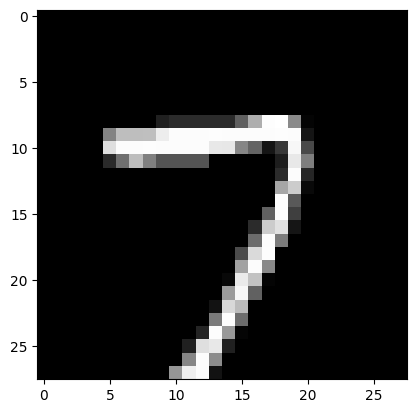

In [29]:
plt.imshow(new_pic, cmap='gray') # Mostramos la imagen en escala de grises